# NZS3101 Design Code
This example demonstrates how to work with the NZS3101 concrete design code. We start by importing the necessary modules: -

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from concreteproperties.design_codes.nzs3101 import NZS3101
import concreteproperties.stress_strain_profile as ssp
from concreteproperties.material import Concrete
from sectionproperties.pre.library.concrete_sections import concrete_rectangular_section
from concreteproperties.concrete_section import ConcreteSection
from concreteproperties.results import MomentInteractionResults
from concreteproperties.results import BiaxialBendingResults
from concreteproperties.results import MomentCurvatureResults

## Create Design Code and Materials
In this example, we'll use the NZS3101:2006 design code. Creating a concrete cross-section geometry with a 40 MPa concrete, with a default density of 2300 kg/m<sup>3</sup> and with reinforcement consisting of a grade 300E reinforcing steel: -

In [2]:
design_code = NZS3101()
concrete_40 = design_code.create_concrete_material(compressive_strength=40)
steel_300E = design_code.create_steel_material(steel_grade="300E")

We can confirm the concrete material properties as follows: -

40 MPa Conc [2300 kg/m$^{3}$] 
(NZS3101:2006)
Concrete Flexural Tensile Strength: 2.40 MPa
Ultimate Compressive Strain: 0.0030


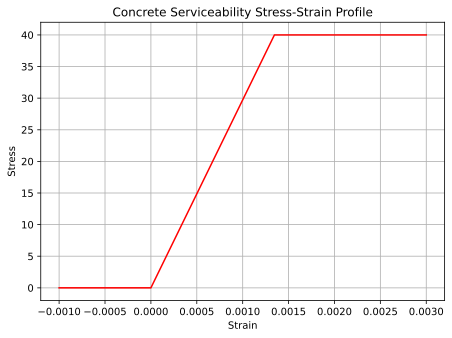

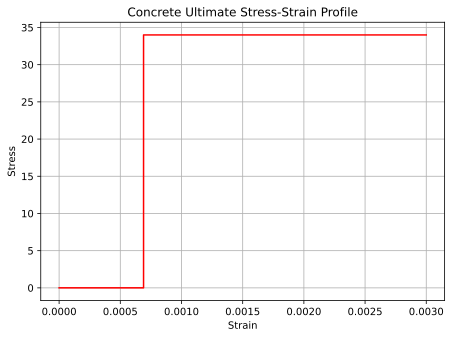

<AxesSubplot: title={'center': 'Concrete Ultimate Stress-Strain Profile'}, xlabel='Strain', ylabel='Stress'>

In [3]:
print(concrete_40.name)
print(
    f"Concrete Flexural Tensile Strength: {concrete_40.flexural_tensile_strength:.2f} MPa"
)
print(
    f"Ultimate Compressive Strain: {concrete_40.ultimate_stress_strain_profile.get_ultimate_compressive_strain():.4f}"
)
concrete_40.stress_strain_profile.plot_stress_strain(
    title="Concrete Serviceability Stress-Strain Profile", fmt="-r"
)
concrete_40.ultimate_stress_strain_profile.plot_stress_strain(
    title="Concrete Ultimate Stress-Strain Profile", fmt="-r"
)

We can confirm the steel material properties as follows: -

300 MPa Steel
(NZS3101:2006)
Density = 7850 kg/m^3
Ultimate Tensile Strain = -0.15
Overstrength Factor = 1.35


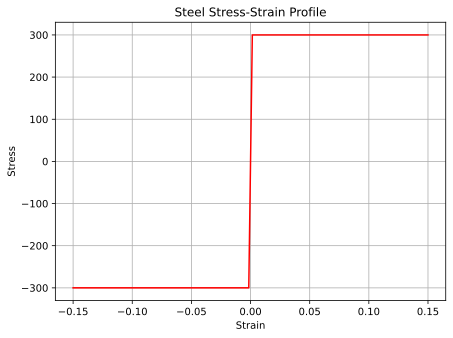

<AxesSubplot: title={'center': 'Steel Stress-Strain Profile'}, xlabel='Strain', ylabel='Stress'>

In [4]:
print(steel_300E.name)
print(f"Density = {steel_300E.density} kg/m^3")
print(
    f"Ultimate Tensile Strain = {steel_300E.stress_strain_profile.get_ultimate_tensile_strain()}"
)
print(f"Overstrength Factor = {steel_300E.phi_os}")
steel_300E.stress_strain_profile.plot_stress_strain(
    title="Steel Stress-Strain Profile", fmt="-r"
)

## Assigning Geometry to the Design Code
This example will analyse an 800D x 500W concrete beam with 6-D25 top and 6-D20 bottom bars with an assumed R12 stirrup size with a specified 35 concrete cover all around. It is assumed the analysis of the concrete frame containing the beam in question is based on a maximum global ductility demand of $\mu$ = 3. An assessment of the Potential Plastic Hinge Region (PPHR) curvature has shown that the PPHR can be designated as a Limited Ductile Plastic Region (LDPR). 

After creating the geometry, it must be assigned to the design code object. When assigning the geometry to the design code we can also specify what type of member the geometry is: -

The NZS3101 design code class includes four valid section types that can be assigned to the geometry, the ``section_type`` parameter impacts the strength reduction factor and defines the maximum axial load in compression that the concrete cross section can sustain: -

- ``column`` - Analyses assigned geometry as a column (or beam) member in accordance with NZS3101:2006 Chapter 9 or 10 as appropriate (default if not specified)

- ``wall`` - Analyses assigned geometry as a doubly reinforced wall member in accordance with NZS3101:2006 Chapter 11

- ``wall_sr_s`` - Analyses assigned geometry as a singly reinforced wall member in accordance with NZS3101:2006 Chapter 11 for design actions causing bending about the strong axis

- ``wall_sr_m`` - Analyses assigned concrete section object as a singly reinforced wall member in accordance with NZS3101:2006 Chapter 11 for design actions causing bending about the minor axis

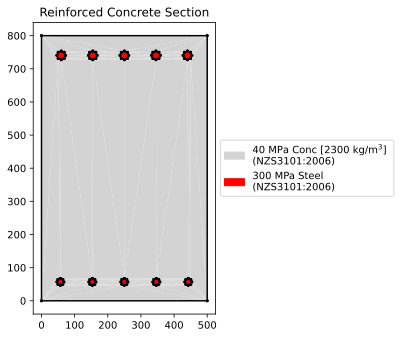

In [5]:
geom_beam = concrete_rectangular_section(
    b=500,
    d=800,
    dia_top=25,
    n_top=5,
    dia_bot=20,
    n_bot=5,
    n_circle=8,
    cover=35 + 12,
    conc_mat=concrete_40,
    steel_mat=steel_300E,
)

conc_sec_beam = ConcreteSection(geom_beam)
conc_sec_beam.plot_section()
design_code.assign_concrete_section(
    concrete_section=conc_sec_beam, section_type="column"
)

## Area Properties
Obtaining the area properties is identical to that of a ``ConcreteSection`` object: -

In [6]:
gross_props = design_code.get_gross_properties()
transformed_props = design_code.get_transformed_gross_properties(
    elastic_modulus=concrete_40.stress_strain_profile.elastic_modulus
)
cracked_props = design_code.calculate_cracked_properties()

gross_props.print_results()
cracked_props.print_results()

     Gross Concrete Section Properties      
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃ Property                  ┃        Value ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩
│ Total Area                │ 4.000000e+05 │
│ Concrete Area             │ 3.959748e+05 │
│ Lumped Reinforcement Area │ 4.025166e+03 │
│ Axial Rigidity (EA)       │ 1.257555e+10 │
│ Mass (per unit length)    │ 9.423397e+08 │
│ Perimeter                 │ 2.600000e+03 │
│ E.Qx                      │ 5.080779e+12 │
│ E.Qy                      │ 3.143887e+12 │
│ x-Centroid                │ 2.500000e+02 │
│ y-Centroid                │ 4.040205e+02 │
│ x-Centroid (Gross)        │ 2.500000e+02 │
│ y-Centroid (Gross)        │ 4.000000e+02 │
│ E.Ixx_g                   │ 2.766621e+15 │
│ E.Iyy_g                   │ 1.046271e+15 │
│ E.Ixy_g                   │ 1.270195e+15 │
│ E.Ixx_c                   │ 7.138824e+14 │
│ E.Iyy_c                   │ 2.602993e+14 │
│ E.Ixy_c                   │ 2.000000e+00 │
│ E.I11                     │ 7.138824e+14 │
│ E.I22                     │ 2.602993e+14 │
│ Principal Axis Angle      │ 0.000000e+00 │
│ E.Zxx+                    │ 1.802826e+12 │
│ E.Zxx-                    │ 1.766946e+12 │
│ E.Zyy+                    │ 1.041197e+12 │
│ E.Zyy-                    │ 1.041197e+12 │
│ E.Z11+                    │ 1.802826e+12 │
│ E.Z11-                    │ 1.766946e+12 │
│ E.Z22+                    │ 1.041197e+12 │
│ E.Z22-                    │ 1.041197e+12 │
│ Ultimate Concrete Strain  │ 3.000000e-03 │
└───────────────────────────┴──────────────┘

   Cracked Concrete Section   
          Properties          
┏━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Property   ┃         Value ┃
┡━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ theta      │  0.000000e+00 │
│ n          │  0.000000e+00 │
│ m          │  0.000000e+00 │
│ m_cr       │  1.428595e+08 │
│ d_nc       │  1.435716e+02 │
│ E.A_cr     │  2.865930e+09 │
│ E.Qx_cr    │  1.881278e+12 │
│ E.Qy_cr    │  7.164825e+11 │
│ x-Centroid │  2.500000e+02 │
│ y-Centroid │  6.564284e+02 │
│ E.Ixx_g_cr │  1.365446e+15 │
│ E.Iyy_g_cr │  2.370343e+14 │
│ E.Ixy_g_cr │  4.703195e+14 │
│ E.Ixx_c_cr │  1.305216e+14 │
│ E.Iyy_c_cr │  5.791368e+13 │
│ E.Ixy_c_cr │ -1.062500e+00 │
│ E.Iuu_cr   │  1.305216e+14 │
│ E.I11_cr   │  1.305216e+14 │
│ E.I22_cr   │  5.791368e+13 │
│ phi_cr     │  0.000000e+00 │
└────────────┴───────────────┘

## Ultimate Bending Capacity
The factored ultimate bending capacity can be found by calling the ``ultimate_bending_capacity()`` method. This method returns a factored and unfactored ``UltimateBendingResults`` object, as well as the capacity reduction factor ``phi``.

The NZS3101 design code class includes five valid analysis types that can be provided to the analysis method: -

* NZS3101-based design checks

    - ``nom_chk`` - Nominal design capacity check - undertake an analysis with $\phi$ = 0.85, and lower characteristic material properties (default if not specified)

    - ``cpe_chk`` - Capacity protected element check - undertake an analysis with $\phi$ = 1.00, and lower characteristic material properties

    - ``os_chk`` - Overstrength capacity check - undertake an analysis with $\phi$ = 1.00, and likely maximum material properties

* NZSEE C5 assessment guideline-based design checks

    - ``prob_chk`` - Probable capacity check - undertake an analysis with $\phi$ = 1.00, and probable material properties
    
    - ``prob_os_chk`` - Probable overstrength capacity check - undertake an analysis with $\phi$ = 1.00, and probable overstrength material properties

Based on an analysis of the concrete frame the column face beam moment demands are $M^*_{pos}$ = 300 kNm, and $M^*_{neg}$ = 450 kNm, the column is an exterior column with a single beam framing into it on one face.

Therefore we need to undertake a nominal design check analysis utilising an ``analysis_type`` of ``nom_chk`` for both positive and negative flexure to compare with the $\mu$ = 3 demands, and match the flexural strength provided as closely as possible to the demands: -


In [7]:
M_star_pos = 280.0
M_star_neg = -442.0

f_ult_res_pos, ult_res_pos, phi_pos = design_code.ultimate_bending_capacity(
    theta=0, pphr_class="LDPR", analysis_type="nom_chk"
)
print("Positive flexure capacity:-")
print(f"M_star_pos = {M_star_pos} kN.m")
print(f"Mn_pos = {ult_res_pos.m_x / 1e6:.2f} kN.m")
print(f"phi = {phi_pos:.3f}")
print(f"phi.Mn_pos = {f_ult_res_pos.m_x / 1e6:.2f} kN.m")
dc_ratio_pos = M_star_pos * 1e6 / f_ult_res_pos.m_x
print(f"Demand/Capacity ratio = {abs(dc_ratio_pos):.3f}\n")

f_ult_res_neg, ult_res_neg, phi_neg = design_code.ultimate_bending_capacity(
    theta=np.pi,
    pphr_class="LDPR",
    analysis_type="nom_chk",
)
print("Negative flexure capacity:-")
print(f"M_star_neg = {M_star_neg} kN.m")
print(f"Mn_neg = {ult_res_neg.m_x / 1e6:.2f} kN.m")
print(f"phi = {phi_neg:.3f}")
print(f"phi.Mn_neg = {f_ult_res_neg.m_x / 1e6:.2f} kN.m")
dc_ratio_neg = M_star_neg * 1e6 / f_ult_res_neg.m_x
print(f"Demand/Capacity ratio = {abs(dc_ratio_neg):.3f}")

Positive flexure capacity:-
M_star_pos = 280.0 kN.m
Mn_pos = 348.99 kN.m
phi = 0.850
phi.Mn_pos = 296.64 kN.m
Demand/Capacity ratio = 0.944

Negative flexure capacity:-
M_star_neg = -442.0 kN.m
Mn_neg = -529.36 kN.m
phi = 0.850
phi.Mn_neg = -449.96 kN.m
Demand/Capacity ratio = 0.982


We can see the nominal design capacity is a close match to the ductile design demands (as the ratio is close to 1.000), so the proposed reinforcement is deemed adequate for the proposed beam size without being overly conservative which would otherwise unnecessarily push up our overstrength demands that the columns would be required to resist. 

Because we are undertaking a ductile design, we must now determine the overstrength capacity of the beam section so we can undertake the necessary capacity design checks on the columns that support the beam. We undertake this check using an ``analysis_type`` of ``os_chk``, this internally factors up the concrete and steel materials to reflect the likely upper limit strengths (overstrength material properties) before undertaking the cross-section analysis.

For an analysis to NZS3101:2006, this typically means the concrete strength increase is based on $f'_c$ + 15 MPa, and steel reinforcement strength increase is based on a strength of $\phi_{o,f_y}f_y$, where typically $\phi_{o,f_y}$ = 1.35 for grade 300E & 500E steel reinforcement materials that comply with AS/NZS4671. 

This is intended to capture the maximum possible actual capacity of the beam to ensure that the columns have sufficient strength for these likely upper-bound actions based on applying capacity design principles. Note a strength reduction factor of $\phi$ = 1.0 is utilised for this check following NZS3101:2006: -

In [8]:
f_ult_res_pos_os, _, _ = design_code.ultimate_bending_capacity(
    theta=0, pphr_class="LDPR", analysis_type="os_chk"
)
print("Positive overstrength demand:-")
print(f"phi_o.Mo = {f_ult_res_pos_os.m_x / 1e6:.2f} kN.m")
os_ratio_pos = f_ult_res_pos_os.m_x / (M_star_pos * 1e6)
print(f"Actual positive flexure overstrength ratio = {abs(os_ratio_pos):.3f}\n")

f_ult_res_neg_os, _, _ = design_code.ultimate_bending_capacity(
    theta=np.pi, pphr_class="LDPR", analysis_type="os_chk"
)
print("Negative overstrength demand:-")
print(f"phi_o.Mo = {f_ult_res_neg_os.m_x / 1e6:.2f} kN.m")
os_ratio_neg = f_ult_res_neg_os.m_x / (M_star_neg * 1e6)
print(f"Actual negative flexure overstrength ratio = {abs(os_ratio_neg):.3f}")

Positive overstrength demand:-
phi_o.Mo = 468.97 kN.m
Actual positive flexure overstrength ratio = 1.675

Negative overstrength demand:-
phi_o.Mo = -713.91 kN.m
Actual negative flexure overstrength ratio = 1.615


This shows that our original nominal analysis moments based on $\mu$ = 3 actions are factored up by a total of 1.675 & 1.615 ratios for positive and negative flexure respectively for determining the overstrength beam moments applied at the face of the supporting columns.

Now that we have our beam overstrength demand, we can check a proposed column design. Note in this example we will assume half of the beam overstrength demand as a moment is distributed to the column above and below the beam-column joint. In an actual design, this ratio would be determined from the analysis and may require to be factored up further by dynamic amplification factors. Note that as well in a real capacity design scenario the face beam overstrength moments would need to be converted to centreline moments before distributing to the columns to determine the column face moments at the top and bottom of the beam/column joint. But for simplicity here to demonstrate a column analysis we will simply distribute the beam overstrength moment evenly above and below the beam/column joint as a simplification.

Firstly, we must define our column section: -

This example will analyse a 600D x 600W concrete column with 12-DH20 bars evenly distributed around the perimeter with an assumed R12 stirrup size with a specified 35 concrete cover all around. Since the columns in this scenario are a Capacity Protected Element (CPE) an ``analysis_type`` of ``cpe_chk`` can be utilised. This means the analysis is based on normal characteristic material strengths, but a strength reduction factor of $\phi$ = 1.0 can be utilised since the demands being checked against was derived on a capacity design basis (i.e., considering overstrength effects). 

An assessment of the curvatures in the PPHRs of the columns indicates that they would be within the Nominally Ductile Plastic Region (NDPR) curvature limits, note that this is the default PPHR region classification so does not need to be specifically entered, but is provided here for completeness when undertaking the analysis.

Under the negative flexure case, the column has an axial tension load of $N_{o,T}$ of -165 kN under the joint, and under the positive flexure case the column has an axial compression overstrength derived load of $N_{o,C}$ = 1100 kN under the joint.

Based on the assumption of half of the beam overstrength moment distributing to the column above and below the beam/column joint this lead to a design moment for the column combined with the tension load of $M_{o,T}$ = -713.9/2 = -356.95 kNm, and combined with the overstrength compression load of $M_{o,C}$ = 469.0/2 = 234.5 kNm.  

Since we are utilising higher strength grade 500E reinforcement in the column, we must first define a new steel material. Note that the same 40 MPa concrete material is being used in the columns: -

In [9]:
steel_500E = design_code.create_steel_material(steel_grade="500E")

We can now create the column section and assign it to the design code, and plot the section to check the geometry: -

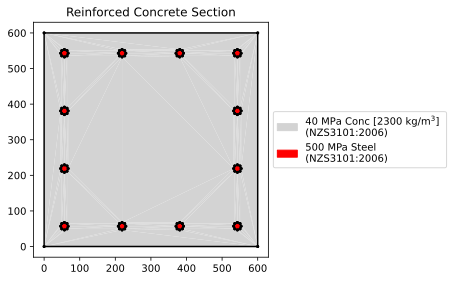

In [10]:
bar_dia = 20

geom_col = concrete_rectangular_section(
    b=600,
    d=600,
    dia_top=bar_dia,
    n_top=4,
    dia_bot=bar_dia,
    n_bot=4,
    dia_side=bar_dia,
    n_side=2,
    n_circle=8,
    cover=35 + 12,
    conc_mat=concrete_40,
    steel_mat=steel_500E,
)

conc_sec_col = ConcreteSection(geom_col)
conc_sec_col.plot_section()
design_code.assign_concrete_section(concrete_section=conc_sec_col)

We can now analyse the section to determine at the axial load required under tension and compression cases what the design moment capacity will be. Since the section is symmetrical, we can just look at the positive result, but if the opposite bending direction was required this can be determined by utilising the ``theta`` parameter to rotate the neutral axis 180 $^{\circ}$ or $\pi$ radians for the analysis: -

In [11]:
M_o_T = -713.91 / 2
N_o_T = -165
M_o_C = 468.97 / 2
N_o_C = 1100

f_ult_res_T, _, _ = design_code.ultimate_bending_capacity(
    pphr_class="NDPR", analysis_type="cpe_chk", n_design=N_o_T * 1e3
)
print("Tension case capacity:-")
print(f"phi.Mn = {f_ult_res_T.m_x / 1e6:.2f} kN.m at axial load of {N_o_T:.2f} kN")
print(f"Mo = {M_o_T} kN.m")
col_ratio_T = M_o_T * 1e6 / f_ult_res_T.m_x
print(f"Actual design ratio = {abs(col_ratio_T):.3f}\n")

f_ult_res_C, _, _ = design_code.ultimate_bending_capacity(
    pphr_class="NDPR", analysis_type="cpe_chk", n_design=N_o_C * 1e3
)
print("Compression case capacity:-")
print(f"phi.Mn = {f_ult_res_C.m_x / 1e6:.2f} kN.m at axial load of {N_o_C:.2f} kN")
print(f"Mo = {M_o_C} kN.m")
col_ratio_C = M_o_C * 1e6 / f_ult_res_C.m_x
print(f"Actual design ratio = {abs(col_ratio_C):.3f}")

Tension case capacity:-
phi.Mn = 450.48 kN.m at axial load of -165.00 kN
Mo = -356.955 kN.m
Actual design ratio = 0.792

Compression case capacity:-
phi.Mn = 738.11 kN.m at axial load of 1100.00 kN
Mo = 234.485 kN.m
Actual design ratio = 0.318


Therefore, we can see that the flexural design would be sufficient for the proposed column.

We can also plot these points on an M/N interaction diagram and a biaxial Mx/My interaction diagram to show that at the target design axial loads, that the design moments lie within the interaction surface.

## Moment/Axial Interaction Diagram
We can plot these points on M/N interaction diagrams and Mx/My interaction diagrams to illustrate that the target axial and moment actions for the design are within the interaction surface. 

We can compute unfactored and factored axial/moment interaction diagrams by calling the ``moment_interaction_diagram()`` method. This method returns a ``MomentInteractionResults`` object with factored and unfactored results, as well as a list of the capacity reduction factors ``phis``.

In [12]:
f_mi_res, mi_res, phis = design_code.moment_interaction_diagram(
    pphr_class="NDPR", analysis_type="cpe_chk", n_spacing=36, progress_bar=False
)

We can compare the factored and unfactored moment interaction diagrams. Since $\phi$ = 1.0, the factored and unfactored interaction curves should coincide: -

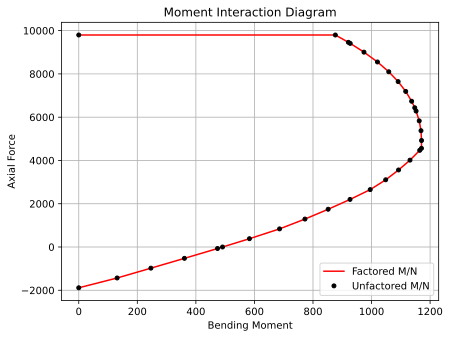

In [13]:
MomentInteractionResults.plot_multiple_diagrams(
    [f_mi_res, mi_res],
    ["Factored M/N", "Unfactored M/N"],
    fmt="or",
    render=False,
    moment="m_xy",
)
plt.gca().lines[0].set_linestyle("solid")
plt.gca().lines[0].set_marker("")
plt.gca().lines[1].set_markersize(4)
plt.gca().lines[1].set_color("k")
plt.legend()
plt.tight_layout()
plt.show()

We can check to see if a combination of axial force and bending moment lies within the moment interaction diagram using the ``point_in_diagram()`` method: -

Case 1: OK
Case 2: OK


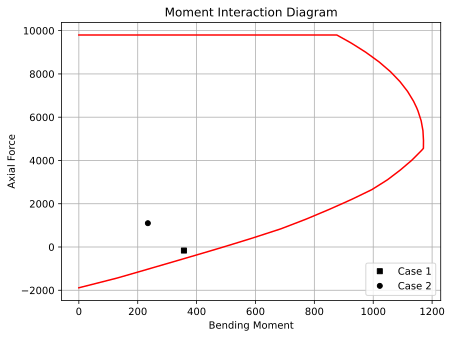

In [14]:
# design load cases
n_stars = [N_o_T * 1e3, N_o_C * 1e3]
m_stars = [-M_o_T * 1e6, M_o_C * 1e6]
marker_styles = ["s", "o"]
n_cases = len(n_stars)

# plot moment interaction diagram
ax = f_mi_res.plot_diagram(fmt="-r", render=False)

# check to see if combination is within diagram and plot result
for idx in range(n_cases):
    case = f_mi_res.point_in_diagram(n=n_stars[idx], m=m_stars[idx])
    print("Case {num}: {status}".format(num=idx + 1, status="OK" if case else "FAIL"))
    ax.plot(
        m_stars[idx] / 1e6,
        n_stars[idx] / 1e3,
        "k" + marker_styles[idx],
        markersize=5,
        label=f"Case {idx + 1}",
    )

ax.legend()
plt.show()

## Biaxial Bending Interaction Diagram
We can also compute factored biaxial bending diagrams by calling the ``biaxial_bending_diagram()`` method. This method returns a factored ``BiaxialBendingResults`` object as well as a list of the capacity reduction factors ``phis``: -

In [15]:
# create biaxial bending diagram
f_bb_res1, phis1 = design_code.biaxial_bending_diagram(
    n_design=N_o_T * 1e3, progress_bar=False
)
f_bb_res2, phis2 = design_code.biaxial_bending_diagram(
    n_design=N_o_C * 1e3, progress_bar=False
)

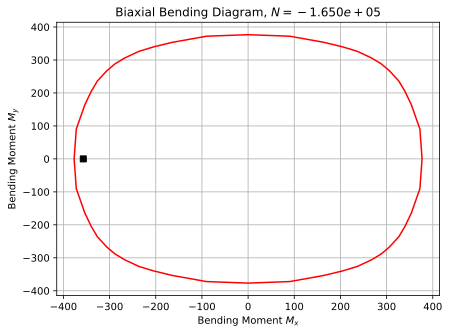

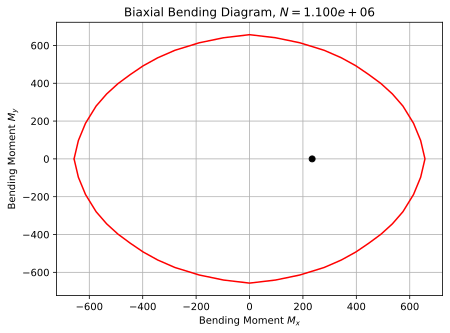

In [16]:
# plot case 1
ax = f_bb_res1.plot_diagram(fmt="-r", render=False)
ax.plot(M_o_T, 0, "sk")
plt.show()

# plot case 2
ax = f_bb_res2.plot_diagram(fmt="-r", render=False)
ax.plot(M_o_C, 0, "ok")
plt.show()

## Creating a 3D interaction surface
We can create more complex representations of the entire interaction surface by stringing together the ``moment_interaction_diagram()`` and ``biaxial_bending_diagram()`` methods and plotting the results on a 3D plot: -

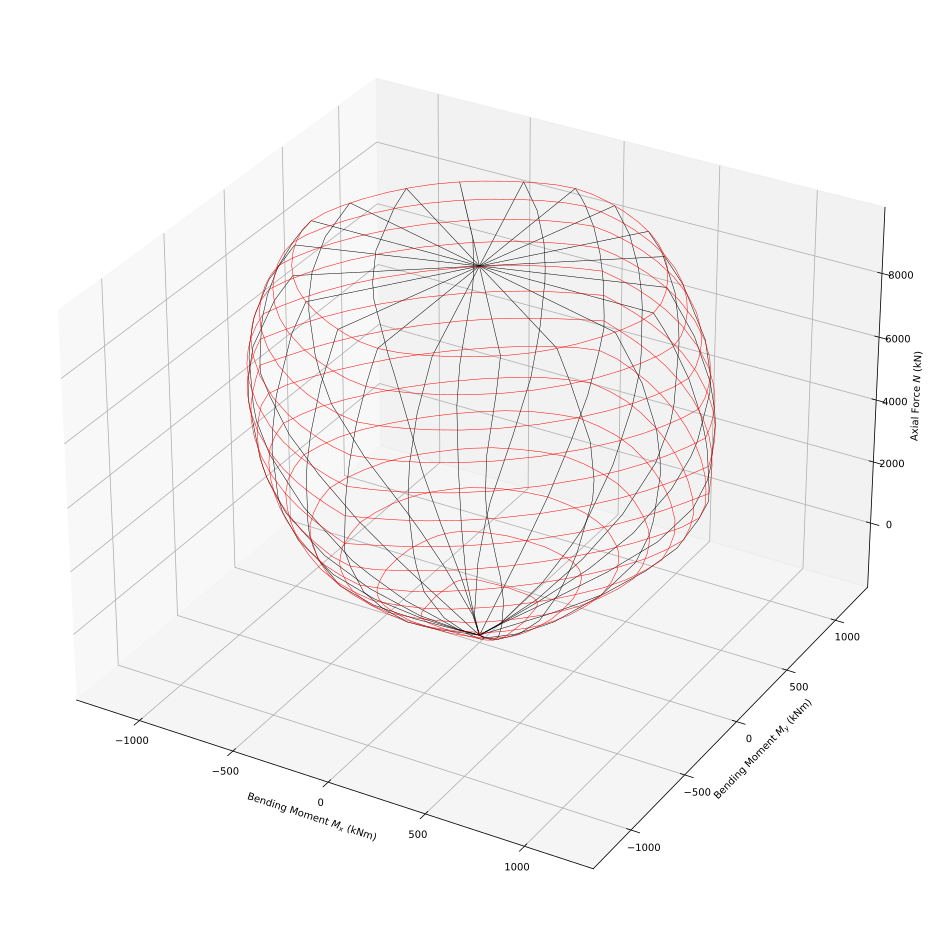

In [17]:
# determine maximum compression load for the column section
max_comp = design_code.max_comp_strength(cpe_design=True)
max_ten = design_code.max_ten_strength()
steps_axial = 15
steps_moment = 20
# generate axial load list
n_design_list = np.linspace(-max_ten + 20000, max_comp, steps_axial)
theta_list = np.linspace(0.0, 2 * np.pi, steps_moment, False)

results_bb = []
results_mi = []
labels = []

for theta in theta_list:
    f_mi_res, _, _ = design_code.moment_interaction_diagram(
        pphr_class="NDPR", analysis_type="cpe_chk", theta=theta, progress_bar=False
    )
    results_mi.append(f_mi_res)

for n_design in n_design_list:
    f_bb_res, _ = design_code.biaxial_bending_diagram(
        pphr_class="NDPR",
        analysis_type="cpe_chk",
        n_design=n_design,
        progress_bar=False,
    )
    results_bb.append(f_bb_res)
    labels.append(f"N* = {n_design/1e3}")

# plot all the M/N and M/M diagrams on one plot
fig = plt.figure(figsize=(16, 10))
ax = plt.axes(projection="3d")
n_scale = 1e-3
m_scale = 1e-6

for mi_res in results_mi:
    n_design, m_x_list = mi_res.get_results_lists(moment="m_x")
    _, m_y_list = mi_res.get_results_lists(moment="m_y")
    n_design = np.array(n_design) * n_scale
    m_x_list = np.array(m_x_list) * m_scale
    m_y_list = np.array(m_y_list) * m_scale

    ax.plot3D(m_x_list, m_y_list, n_design, "-k", linewidth=0.5)

for i, bb_res in enumerate(results_bb):
    m_x_list, m_y_list = bb_res.get_results_lists()
    m_x_list = np.array(m_x_list) * m_scale
    m_y_list = np.array(m_y_list) * m_scale

    n_design = np.array(n_design_list[i]) * n_scale
    ax.plot3D(m_x_list, m_y_list, n_design, "-r", linewidth=0.5)

ax.set_xlabel("Bending Moment $M_x$ (kNm)")
ax.set_ylabel("Bending Moment $M_y$ (kNm)")
ax.set_zlabel("Axial Force $N$ (kN)")

plt.tight_layout(pad=-10)
plt.show()

## NZSEE Probable Strength Analyses
The ``NZS3101`` design code also allows for the analysis of concrete cross-sections in accordance with the NZSEE C5 Assessment Guideline provisions.

These guidelines are intended for the assessment of existing structures based on probable material strength assumptions for the steel and concrete materials. The probable strength of materials is intended to represent more of an average strength approach, recognising that in the real world structures the material strengths are less likely to all be measured to be 5% characteristic strength value.

To utilise these types of analyses within ``ultimate_bending_capacity()``, ``moment_interaction_diagram()`` and ``biaxial_bending_diagram()`` methods we can specify an ``analysis_type`` of ``prob_chk`` or ``prob_os_chk`` to undertake a normal or overstrength probable strength based analysis. 

We can specify predefined probable strength steel materials that are based on common historic material probable strength properties from the NZSEE C5 guidelines, or we can specify a steel material based on characteristic properties and the analysis will internally scale these to appropriate probable strength-based material properties. Similarly, concrete strengths are specified based on characteristic strengths and are internally scaled to the appropriate probable strength-based concrete material when a probable strength based ``analysis_type`` is specified.

## Moment-Curvature Analysis
Note we will undertake a moment-curvature analysis based on an unconfined probable strength based analysis to the NZSEE C5 assessment guidelines.

The section we will analyse will be a 600D x 400W beam section with 5-D28 grade 275 bars top and bottom, and D10 stirrups with 30 cover and an original specified characteristic concrete strength of 25 MPa.

We utilise these parameters to create a new concrete cross-section with a predefined steel material with probable strength properties and a characteristic concrete strength properties.

For the results to be valid we need to utilise a stress/strain model for the concrete that accurately reflects the behaviour of the concrete. The NZSEE C5 Assessment Guidelines utilised a modified Mander concrete model for this purpose for moment-curvature analyses. 

Note it may not be appropriate to utilise a concrete stress/strain relationship that was deemed suitable for an analysis to determine the ultimate capacity of a concrete cross section as these typically do not model the degradation of the concrete strength at higher strains.

Note that for a moment-curvature analysis to NZSEE C5 assessment guidelines, we can utilise a higher ultimate concrete strain of $\varepsilon_{c,max}$ = 0.004 for an unconfined analysis. Note also for a moment-curvature analysis to the NZSEE C5 assessment guidelines that the limiting strain in the reinforcement is taken as $\varepsilon_{c,max}$ = 0.6 $\varepsilon_{cu}$ but $\leq$ 0.06 (or 6% strain). 

Note if the section can be classified as being confined, the concrete limiting strain can be even higher leading to increased ductility of the cross-section (refer to NZSEE C5 assessment guidelines for further discussion). However, for a confined analysis the section is typically analysed assuming the cover concrete has spalled as the cover concrete is unconfined (so a concrete section corresponding to this particular scenario would need to be created if a confined concrete stress-strain relationship ws being utilised).

We will undertake the moment-curvature analysis assuming the concrete can resist tension up to the modulus of rupture defined in the NZSEE C5 guidelines.


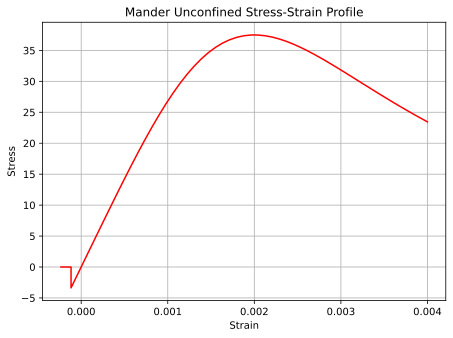

<AxesSubplot: title={'center': 'Mander Unconfined Stress-Strain Profile'}, xlabel='Strain', ylabel='Stress'>

In [18]:
# create new materials overriding default ultimate strains with values appropriate for
# the moment-curvature analysis
steel_275 = design_code.create_steel_material(
    steel_grade="275", fracture_strain=min(0.06, (15 / 100) * 0.6)
)

# determine the concrete probable strength in compresison and tension
compressive_strength = 25
prob_tensile_strength = design_code.concrete_tensile_strength(
    compressive_strength=compressive_strength, prob_design=True
)
prob_compressive_strength = design_code.prob_compressive_strength(compressive_strength)

# create a probable strength concrete material with properties suitable for a
# moment-curvature analysis
concrete_25_prob = Concrete(
    name="Mander Concrete",
    density=2300,
    stress_strain_profile=ssp.ModifiedMander(
        elastic_modulus=design_code.e_conc(prob_compressive_strength),
        compressive_strength=prob_compressive_strength,
        tensile_strength=prob_tensile_strength,
        conc_tension=True,
    ),
    ultimate_stress_strain_profile=ssp.RectangularStressBlock(
        compressive_strength=prob_compressive_strength,
        alpha=design_code.alpha_1(prob_compressive_strength),
        gamma=design_code.beta_1(prob_compressive_strength),
        ultimate_strain=0.003,
    ),
    flexural_tensile_strength=prob_tensile_strength,
    colour="lightgrey",
)

concrete_25_prob.stress_strain_profile.plot_stress_strain(
    title="Mander Unconfined Stress-Strain Profile", fmt="-r"
)

We can show that the predefined grade 275 ($f_y$ = 275 MPa) steel material has a (probable) yield strength of 324 MPa: -

324 MPa Steel
(NZS3101:2006)
Density = 7850 kg/m^3
Probable yield strength = 324.0 MPa


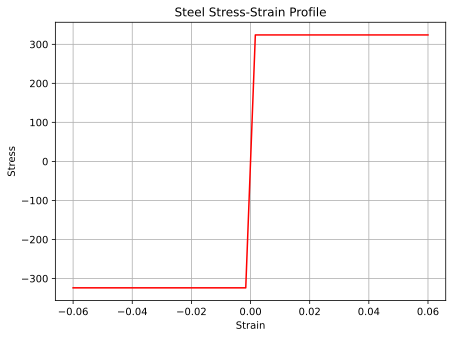

<AxesSubplot: title={'center': 'Steel Stress-Strain Profile'}, xlabel='Strain', ylabel='Stress'>

In [19]:
print(steel_275.name)
print(f"Density = {steel_275.density} kg/m^3")
print(
    f"Probable yield strength = {steel_275.stress_strain_profile.get_yield_strength()}"
    f" MPa"
)
steel_275.stress_strain_profile.plot_stress_strain(
    title="Steel Stress-Strain Profile", fmt="-r"
)

Next we create our beam section and assign it to the design code: -

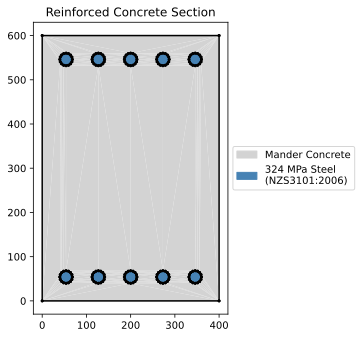

In [20]:
bar_dia = 28

geom_beam = concrete_rectangular_section(
    b=400,
    d=600,
    dia_top=bar_dia,
    n_top=5,
    dia_bot=bar_dia,
    n_bot=5,
    n_circle=16,
    cover=30 + 10,
    conc_mat=concrete_25_prob,
    steel_mat=steel_275,
)

conc_sec = ConcreteSection(geom_beam)
conc_sec.plot_section()
design_code.assign_concrete_section(concrete_section=conc_sec)

You will note that when using a predefined probable strength based steel grade/material that the reinforcing bars are plotted with a blue colour by default to distinguish them from a characteristic strength based material.


Given we now have the probable strength-based section assigned to the design code, we can undertake the moment-curvature analysis: -

The failure material is:-
Mander Concrete


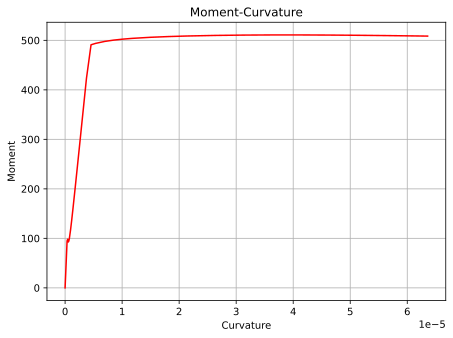

Cracking moment is M_cr = 105.74 kNm


In [21]:
moment_curvature_results = conc_sec.moment_curvature_analysis(
    theta=0, progress_bar=False
)
print(
    f"The failure material is:-\n{moment_curvature_results.failure_geometry.material.name}"
)

MomentCurvatureResults.plot_results(moment_curvature_results, fmt="-r")
print(
    f"Cracking moment is M_cr = {conc_sec.calculate_cracked_properties(theta=0).m_cr / 1e6:.2f} kNm"
)

We can see from the moment curvature analysis that section initially remains uncracked and displays a stiffer initial response. Once cracked, because the uncracked moment capacity is higher than the reinforced capacity at that curvature we see a dip in the moment-curvature diagram. 

We can see that the cracked behaviour results in a lower stiffness as evidenced by the shallower slope of the curve after cracking occurs. The engagement and yielding of the tension face bars can be appreciated by the change in direction of the slope of the moment-curvature diagram at higher moment capacities.

We can determine from the moment-curvature analysis the maximum moment capacity achieved and the maximum curvature:-

In [22]:
max_moment = max(moment_curvature_results.m_xy) * 1e-6
max_curvature = max(moment_curvature_results.kappa)
print(f"Maximum Moment = {max_moment:.2f} kN.m")
print(f"Maximum Curvature = {max_curvature:.8f} rads")

Maximum Moment = 510.90 kN.m
Maximum Curvature = 0.00006357 rads


We can assess the same sections probable strength utilising the NZS3101 rectangular stress block. Note we must recreate the materials and hence section due to the previously specified custom limiting strains defined for the moment-curvature analysis: -

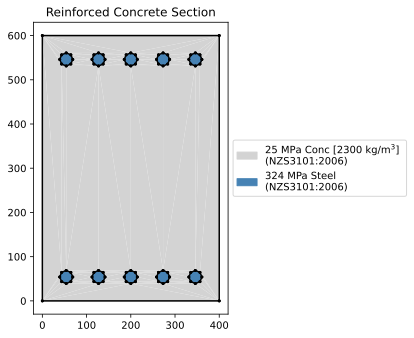

In [23]:
concrete_25 = design_code.create_concrete_material(compressive_strength=25)
steel_275 = design_code.create_steel_material(steel_grade="275")

bar_dia = 28

geom_beam = concrete_rectangular_section(
    b=400,
    d=600,
    dia_top=bar_dia,
    n_top=5,
    dia_bot=bar_dia,
    n_bot=5,
    n_circle=8,
    cover=30 + 10,
    conc_mat=concrete_25,
    steel_mat=steel_275,
)

conc_sec = ConcreteSection(geom_beam)
conc_sec.plot_section()
design_code.assign_concrete_section(concrete_section=conc_sec)

Note by undertaking the ``ultimate_bending_capacity()`` utilising an ``analysis_type`` of ``prob_chk`` the concrete strength is appropriately scaled internally (that is why we specified the lower characteristic concrete strength).

In [24]:
n_design = 0 * 1e3
f_ult_res, _, _ = design_code.ultimate_bending_capacity(
    pphr_class="NDPR", analysis_type="prob_chk", n_design=n_design
)

print("Probable Moment Capacity from ultimate strength check: -")
print(
    f"Mp = {f_ult_res.m_x / 1e6:.2f} kN.m at an axial load of {n_design/1e3:.2f} kN\n"
)
print("Maximum Moment Capacity from moment-curvature analysis: -")
print(f"Maximum Moment = {max_moment:.2f} kN.m")

Probable Moment Capacity from ultimate strength check: -
Mp = 509.08 kN.m at an axial load of 0.00 kN

Maximum Moment Capacity from moment-curvature analysis: -
Maximum Moment = 510.90 kN.m


This shows excellent agreement between the moment-curvature analysis results and the probable moment capacity analysis results when there is no axial load. It is interesting to note that there is a gradual strength gain to the final probable strength capacity over the entire curvature range after the reinforcement yields. 

We can also calculate the probable curvature capacity from the NZSEE C5 assessment guidelines utilising the results from the probable capacity analysis:-

i.e.: -
Lesser of $\phi_{cap}$ = $\displaystyle{\frac{\varepsilon_{c,max}}{c_{prob}}}$ or $\phi_{cap}$ = $\displaystyle{\frac{\varepsilon_{s,max}}{d-c_{prob}}}$

We can therefore evaluate the effective depth of the tension reinforcment at the probable capacity and then evaluate $\phi_{cap}$ according to the NZSEE C5 assessment guidelines and compare this result to the maximum curvature obtained within the moment-curvature analysis results: -

In [25]:
# section depth
h = 600

# determine neutral access depth at the probable moment capacity
c_prob = f_ult_res.d_n

# determine stress results for the reinforcement based on the probable strength
stress_res = design_code.concrete_section.calculate_ultimate_stress(
    f_ult_res
).lumped_reinforcement_forces

sum_force = 0
sum_force_lever = 0

# determine the effective depth d from extreme compressive fibre of the section
for bar in stress_res:
    force, d_x, d_y = bar
    if force <= 0:
        sum_force += force
        sum_force_lever += force * (h / 2 - d_y)

eff_depth = sum_force_lever / sum_force

# determine the probable curvature capacity
phi_cap = min(0.004 / c_prob, min(0.06, (15 / 100) * 0.6) / (eff_depth - c_prob))

print(f"Neutral axis depth at the probable capacity = {c_prob:.2f} mm")
print(f"Effective depth of tension reinforcement = {eff_depth:.2f} mm")
print(f"Probable Curvature Capacity = {phi_cap:.8f} rads")
print(f"Maximum Curvature from moment-curvature analysis = {max_curvature:.8f} rads")
print(f"Ratio of results = {phi_cap/max_curvature:.2f}")

Neutral axis depth at the probable capacity = 67.29 mm
Effective depth of tension reinforcement = 546.00 mm
Probable Curvature Capacity = 0.00005944 rads
Maximum Curvature from moment-curvature analysis = 0.00006357 rads
Ratio of results = 0.94


This calculated ratio shows that the NZSEE assessment guidelines formulas have slightly underestimated the maximum curvature obtained when compared with that from the moment-curvature analysis. This highlights the importance of undertaking a moment-curvature analyses to capture the behaviour of the concrete cross-section, rather than placing sole reliance on empirical formulas.